In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from interval_model import *

fname = "..\\..\\data\\VRPTW\\solomon_25\\R101.json"

tlim = 10

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

best_known_solution: 828.94
num_cust= 25
num_vehicles= 25
n= 75
len(vrp.distance_matrix)=  75
vrp.distance_matrix[0]=  [0, 325, 145, 322, 322, 248, 210, 315, 178, 155, 264, 166, 264, 468, 453, 424, 407, 228, 282, 164, 292, 392, 461, 277, 376, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152]
vrp.distance_matrix[1]=  [325, 0, 344, 202, 238, 164, 362, 360, 474, 432, 502, 234, 94, 211, 130, 251, 326, 274, 474, 490, 104, 122, 233, 349, 301, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
vrp.distance_matrix[2]=  [145, 344, 0, 250, 427, 335, 353, 450, 150, 291, 403, 111, 320, 531, 471, 514, 522, 

{'LogPeriod': 100000, 'LogVerbosity': 'Terse'}

In [20]:
solution = model.solve(TimeLimit=tlim)

C:/Users/micha/OneDrive - České vysoké učení technické v Praze/Dokumenty/PycharmProjects/optimizin/General-Optimization-Solver/src/vrp/interval_model.py:168(stream:2292:1): Warning: Constraint 'span': master interval variable 'T0' is optional but spanned interval 'V25_0' is present.
                                                                                                                                                                                              span(T0, [V0_0, V1_0, V2_0, V3_0, V4_0, V5_0, V6_0, V7_0, V8_0, V9_0, V10_0, V11_0, V12_0, V13_0, V14_0, V15_0, V16_0, V17_0, V18_0, V19_0, V20_0, V21_0, V22_0, V23_0, V24_0, V25_0, V26_0, V27_0, V28_0, V29_0, V30_0, V31_0, V32_0, V33_0, V34_0, V35_0, V36_0, V37_0, V38_0, V39_0, V40_0, V41_0, V42_0, V43_0, V44_0, V45_0, V46_0, V47_0, V48_0, V49_0, V50_0, V51_0, V52_0, V53_0, V54_0, V55_0, V56_0, V57_0, V58_0, V59_0, V60_0, V61_0, V62_0, V63_0, V64_0, V65_0, V66_0, V67_0, V68_0, V69_0, V70_0, V71_0, V72_0, V73_0, V74_0])


In [21]:
import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            if sol.presence != False and sol.size != 0:
                print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()


V0_6: (start=2344, end=2444, size=100, length=100)
V0_6: (start=2344, end=2444, size=100, length=100)
V3_6: (start=1517, end=1617, size=100, length=100)
V3_6: (start=1517, end=1617, size=100, length=100)
V4_6: (start=240, end=340, size=100, length=100)
V4_6: (start=240, end=340, size=100, length=100)
V13_6: (start=540, end=640, size=100, length=100)
V13_6: (start=540, end=640, size=100, length=100)
V14_6: (start=798, end=898, size=100, length=100)
V14_6: (start=798, end=898, size=100, length=100)
V21_6: (start=1056, end=1156, size=100, length=100)
V21_6: (start=1056, end=1156, size=100, length=100)
V22_6: (start=1267, end=1367, size=100, length=100)
V22_6: (start=1267, end=1367, size=100, length=100)
V23_6: (start=1967, end=2067, size=100, length=100)
V23_6: (start=1967, end=2067, size=100, length=100)
V24_6: (start=1717, end=1817, size=100, length=100)
V24_6: (start=1717, end=1817, size=100, length=100)
T6: (start=0, end=2596, size=2596, length=2596)
T6: (start=0, end=2596, size=2596,

[0, 5, 14, 15, 22, 23, 4, 25, 24, 1, 0]
[0, 5, 14, 15, 22, 23, 4, 25, 24, 1, 0]
[0, 2, 21, 12, 3, 9, 20, 10, 11, 19, 7, 18, 8, 17, 16, 6, 13, 0]
[0, 2, 21, 12, 3, 9, 20, 10, 11, 19, 7, 18, 8, 17, 16, 6, 13, 0]


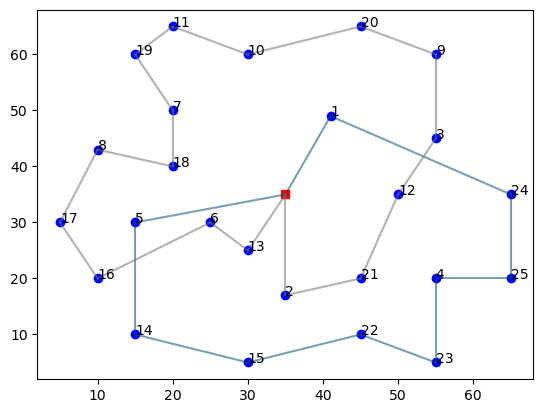

In [22]:
# convert sequence to path
paths = []
for solution in solutions:
    path = []
    for i in range(len(solution.lvars)):
        prdel = int(solution.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)


In [ ]:
ref_paths = instance['our_best_solution']
visualize_path(ref_paths, None, cvrptw_prob)

best_known_solution: 191.3
num_cust= 25
num_vehicles= 25
n= 75
C:/Users/micha/OneDrive - České vysoké učení technické v Praze/Dokumenty/PycharmProjects/optimizin/General-Optimization-Solver/src/vrp/interval_model.py:183(stream:2028:596): Warning: Boolean expression 'presenceOf' is always true because interval variable 'V25_0' is declared present.
                                                                                                                                                                                                presenceOf(V25_0)
C:/Users/micha/OneDrive - České vysoké učení technické v Praze/Dokumenty/PycharmProjects/optimizin/General-Optimization-Solver/src/vrp/interval_model.py:183(stream:2028:1171): Warning: Boolean expression 'presenceOf' is always true because interval variable 'V50_0' is declared present.
                                                                                                                                                          

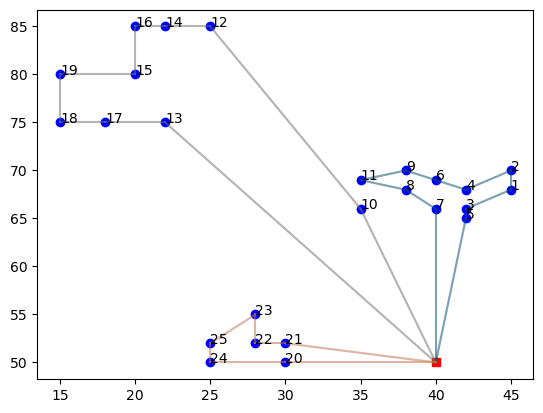

Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 5 is 151
Node 5 arrive 151 early 150 late 670 start 151
Distance from 5 to 3 is 10
Node 3 arrive 1061 early 650 late 1460 start 1061
Distance from 3 to 1 is 36
Node 1 arrive 1997 early 9120 late 9670 start 9120
Distance from 1 to 2 is 20
Node 2 arrive 10040 early 8250 late 8700 start 10040


AssertionError: Too late for node 2

In [43]:
from interval_model import *

fname = "..\\..\\data\\VRPTW\\solomon_25\\C101.json"

tlim = 10

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

solution = model.solve(TimeLimit=tlim)

import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            pass
            # if sol.presence != False and sol.size != 0:
            #     print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                # print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()

# convert sequence to path
paths = []
for solution in solutions:
    path = []
    for i in range(len(solution.lvars)):
        prdel = int(solution.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    if path in paths:
        pass
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)
validate_path(paths, cvrptw_prob)

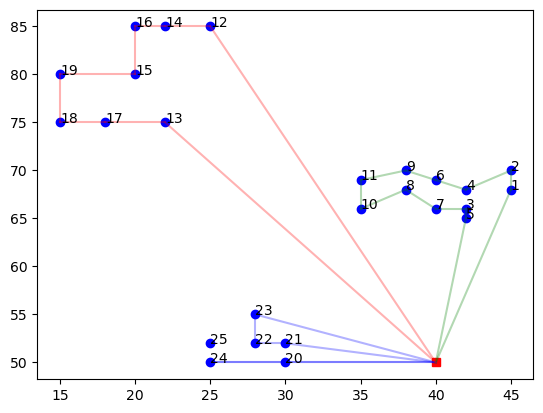

In [27]:
ref_paths = instance['our_best_solution']
visualize_path(ref_paths, None, cvrptw_prob)

In [28]:
validate_path(paths, cvrptw_prob)


Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 5 is 151
Node 5 arrive 151 early 150 late 670 start 151
Distance from 5 to 3 is 10
Node 3 arrive 1061 early 650 late 1460 start 1061
Distance from 3 to 7 is 20
Node 7 arrive 1981 early 1700 late 2250 start 1981
Distance from 7 to 8 is 28
Node 8 arrive 2909 early 2550 late 3240 start 2909
Distance from 8 to 11 is 31
Node 11 arrive 3840 early 4480 late 5050 start 4480
Distance from 11 to 9 is 31
Node 9 arrive 5411 early 5340 late 6050 start 5411
Distance from 9 to 6 is 22
Node 6 arrive 6333 early 6210 late 7020 start 6333
Distance from 6 to 4 is 22
Node 4 arrive 7255 early 7270 late 7820 start 7270
Distance from 4 to 2 is 36
Node 2 arrive 8206 early 8250 late 8700 start 8250
Distance from 2 to 1 is 20
Node 1 arrive 9170 early 9120 late 9670 start 9170
Distance from 1 to 23 is 214
Node 23 arrive 10284 early 7320 late 7770 start 10284


AssertionError: Too late for node 23